In [0]:
import numpy as np
import random
from numpy.random import randn
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [0]:
from google.colab import files
test=files.upload()

Saving iris.csv to iris (1).csv


In [0]:
#Iris Dataset
data = pd.read_csv('iris.csv')
dd = data.iloc[0:,0:4]
x=dd.values
y=x@x.T
print(y.shape)

(150, 150)


In [0]:
#Power iteration method
def PowerIteration(Mat,X):
  
  Y = Mat.dot(X)
  maxel = max(Y)
  L = maxel
  x = Y/L
  lhs = Mat.dot(x)
  rhs = maxel*x
  lambd= lhs-rhs
  flag=1
  for j in range(len(lambd)):
      if abs(lambd[j])>0.0000001:
        flag=0
        break
  if flag==1:
    return maxel,x
  else:
    return PowerIteration(Mat,x)

In [0]:
#Declare Matrix A
A=y.T
print(A.shape)
#Find Covariance Matrix
original = A.T
row_sums = A.sum(axis=1)
A = A/ row_sums[:, np.newaxis]
A_cov = np.cov(A)

A_cov = np.array([[1,2,1],
                  [4,3,2],
                  [2,5,6],
    
])
pp=A_cov

(150, 150)


In [0]:
#Get matrix x for Wielandt’s Deflation
def getx(vec,val):
  x = np.zeros((vec.shape[1],vec.shape[0]))
  p = np.ones((vec.shape[1],vec.shape[0]-1))
  sumval=0
  for i in range(vec.shape[0]-1):
    sumval =sumval+ vec[i][0]*p[0][i]
  last = (val - sumval)/vec[vec.shape[0]-1][0]
  p = np.append(p,last)
  p=p.reshape(vec.shape[1],vec.shape[0])
  print(p.dot(vec))
  return p/val

In [0]:
# Find the eigenvalue and eigenvector
#Initialise a random vector X
values=[]
vectors=[]
for i in range(3):
  X = np.ones(A_cov.shape[0])*0.5
  value,vector=PowerIteration(A_cov,X)
  val = ((A_cov.dot(vector) * vector).sum())/(vector*vector).sum()
  print(val)
  values.append(value)
  vectors.append(vector)
  print("EigenValue ",i,value)
  vector=vector.reshape(vector.shape[0],1)
  matx = getx(vector,val)
  print(matx)
  A_cov = A_cov - val*(vector.dot(matx))
  print(A_cov)



9.000000005186298
EigenValue  0 9.000000052505621
[[9.00000001]]
[[0.11111111 0.11111111 0.91666667]]
[[ 0.75        1.75       -1.06250001]
 [ 3.5         2.5        -2.12500002]
 [ 1.          4.         -2.25      ]]
1.9999999691086465
EigenValue  1 1.9999999229309706
[[1.99999997]]
[[0.50000001 0.50000001 0.29166666]]
[[ 0.27777778  1.27777778 -1.33796296]
 [ 2.55555556  1.55555556 -2.67592592]
 [ 0.          3.         -2.83333331]]
-0.9999999793002489
EigenValue  2 -0.9999999793002541
[[-0.99999998]]
[[-1.00000002 -1.00000002  1.48309181]]
[[-0.72222222  0.27777778  0.14512882]
 [ 1.15389351  0.15389351 -0.59713246]
 [-2.2936288   0.7063712   0.56832871]]


In [0]:
from scipy import linalg as LA
e_vals, e_vecs = LA.eig(pp)
print(e_vals)


[1.+0.j 3.+0.j]


In [0]:

original = y
pointx=original.dot(vectors[0])
pointy=original.dot(vectors[1])
pointz=original.dot(vectors[2])

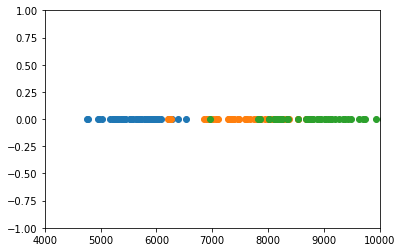

In [0]:
# 1-D Visualization

plt.axis([4000,10000, -1, 1])
for i in range(3):
    plt.scatter(pointx[50*(i%4):50*((i+1)%4)], np.zeros(pointx.shape[0])[50*(i%4):50*((i+1)%4)])
plt.show()

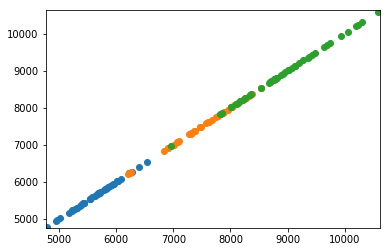

In [0]:
plt.axis([min(pointx),max(pointx), min(pointy), max(pointy)])
for i in range(3):
    plt.scatter(pointx[50*(i%4):50*((i+1)%4)], pointy[50*(i%4):50*((i+1)%4)])
plt.show()

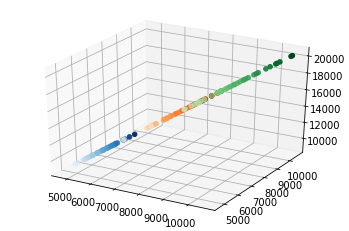

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(pointx[:50], pointy[:50], pointz[:50], c=pointz[:50], cmap='Blues');
ax.scatter3D(pointx[50:100], pointy[50:100], pointz[50:100], c=pointz[50:100], cmap='Oranges');
ax.scatter3D(pointx[100:], pointy[100:], pointz[100:], c=pointz[100:], cmap='Greens');